<a href="https://colab.research.google.com/github/Frankuli/Data-Science-I/blob/main/ProyectoDS_Fraude_Manassero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**


En este proyecto trabajare con el ***Credit Card Transactions Fraud Detection Dataset***, un conjunto de datos simulado que aborda un desafío clave en el ámbito financiero: la detección de fraudes en transacciones con tarjetas de crédito. Este dataset fue creado utilizando la herramienta **Sparkov Data Generation**, diseñada por *Brandon Harris*, que genera transacciones simuladas basadas en perfiles demográficos y patrones de comportamiento transaccional, logrando características muy cercanas a escenarios reales.

El dataset incluye registros de transacciones realizadas entre **enero de 2019 y diciembre de 2020**, con un equilibrio entre transacciones legítimas y fraudulentas. En total, se recopilan datos de* 1000 clientes y 800 comerciantes*, detallando aspectos como montos de las transacciones, categorías de gasto, ubicaciones de los comerciantes y características demográficas de los clientes. Este nivel de detalle lo convierte en un recurso ideal para analizar patrones de fraude y explorar soluciones basadas en datos para prevenir este tipo de actividades.
Fuente: https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [ ]:
# Importacion de librerias
from google.colab import drive
import os
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Muestra todas las columnas
pd.set_option('display.max_columns', None)

%cd '/content/gdrive/MyDrive/Data Science I/Preentrega 1'
# Cargar el archivo CSV
df = pd.read_csv('fraudTest.csv', sep=',')

/content/gdrive/MyDrive/Data Science I/Preentrega 1


# Detalles

## Exploracion del Dataset

In [ ]:
# Mostrar las primeras filas del dataset
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Como se ve el dataset no cuenta con valores faltantes o nulos,tiene 23 columnas y 555.719 filas donde cada una es una transaccion diferente.

### Descripcion de columnas




**Unnamed:** Índice numérico de las filas en el dataset. Esta no es necesaria, entonces la podemos sacar

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

**trans_date_trans_time:** Fecha y hora en que se realizó la transacción. Tipo: Texto, variable: Cuantitativa continua .

**cc_num:** Número único asociado a la tarjeta de crédito utilizada en la transacción.Tipo: Entero largo, variable: Cualitativa nominal.

**merchant:** Nombre del comerciante o tienda donde se realizó la transacción.
Tipo: string, variable: Cualitativa nominal.

**category**: Categoría del comerciante. Tipo: Texto, variable: Cualitativa nominal.

**amt:** Monto de la transacción realizada.Tipo: Decimal, variable: Cuantitativa continua.

**first:** Nombre del titular de la tarjeta.Tipo: Texto, variable: Cualitativa nominal.

**last:** Apellido del titular de la tarjeta.Tipo: Texto, variable: Cualitativa nominal.

**gender:** Género del titular de la tarjeta. Tipo: Texto, variable: Cualitativa nominal.

**street:** Dirección del titular de la tarjeta. Tipo: Texto, variable: Cualitativa nominal.

**city:** Ciudad del titular de la tarjeta. Tipo: Texto, variable: Cualitativa nominal.

**zip:** Código postal del titular de la tarjeta. Tipo: Entero, variable: Cualitativa nominal.

**lat:** Latitud de la dirección del titular de la tarjeta. Tipo: Decimal, variable: Cuantitativa continua.

**long:** Longitud de la dirección del titular de la tarjeta. Tipo: Decimal, variable: Cuantitativa continua.

**city_pop:** Población de la ciudad donde reside el titular de la tarjeta.Tipo: Entero, variable: Cuantitativa discreta.

**job:** Profesión del titular de la tarjeta. Tipo: Texto, variable: Cualitativa nominal.

**dob:** Fecha de nacimiento del titular de la tarjeta. Tipo: Fecha, variable: Cuantitativa continua.

**trans_num:** Identificador único de la transacción. Tipo: Texto. variable: Cualitativa nominal.

**unix_time:** Marca de tiempo de la transacción en formato Unix. *(es un sistema para representar el tiempo en informática. Se define como el número de segundos transcurridos desde la medianoche del 1 de enero de 1970 (UTC))* Tipo: Entero, variable: Cuantitativa continua.

**merch_lat:** Latitud de la ubicación del comerciante. Tipo: Decimal, variable: Cuantitativa continua.

**merch_long:** Longitud de la ubicación del comerciante. Tipo: Decimal, variable: Cuantitativa continua.

**is_fraud:** Indica si la transacción fue fraudulenta (1) o legítima (0). Tipo: Entero, variable: Cualitativa nominal.



# Hipotesis y Preguntas

## Hipótesis

Los fraudes en transacciones con tarjetas de crédito no ocurren al azar, sino que siguen patrones específicos relacionados con el monto de las transacciones, las características demográficas de los clientes y los momentos en que se realizan las operaciones, como días de la semana o franjas horarias.

## Preguntas

1.	¿Hay diferencias en la proporción de fraudes según el género de los clientes?
2.	¿Existe una relación entre los montos altos de las transacciones y la probabilidad de que sean fraudulentas?
3.	¿Los fraudes son más comunes en ciertos días de la semana o franjas horarias?

###1.	¿Hay diferencias en la proporción de fraudes según el género de los clientes?

Para ver esto, voy a hacer un conteo por genero de aquellas transacciones que hayan sido fraudulentas y representarlas con un grafico de barras.

In [ ]:
#filtro transacciones que son fraude
fraud_data = df[df['is_fraud'] == 1]

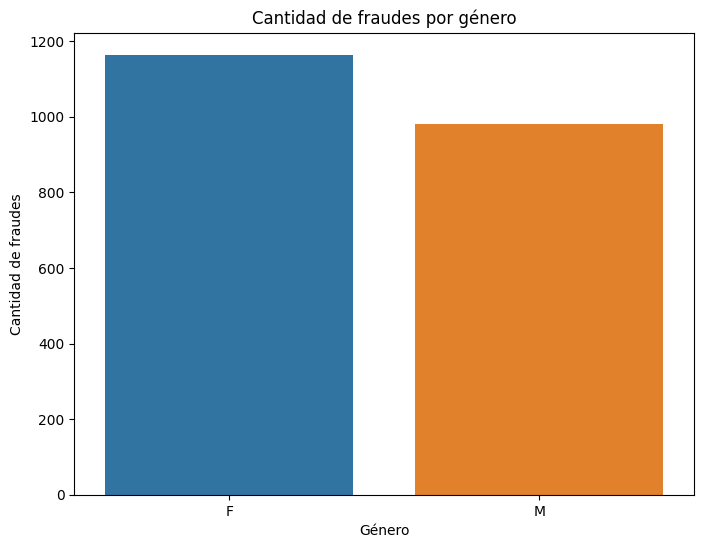

In [ ]:
# Agrupo por género y cuento
fraud_counts = fraud_data['gender'].value_counts().reset_index()
fraud_counts.columns = ['gender', 'count']

# grafico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=fraud_counts, x='gender', y='count', hue='gender')

plt.title('Cantidad de fraudes por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de fraudes')

plt.show()


Se puede ver como el sexo femenino es quien tiene mayor numero de transacciones fraudulentas.

Con este grafico de violin intento representar la cantidad de dinero gastado en una transaccion segun el generoo

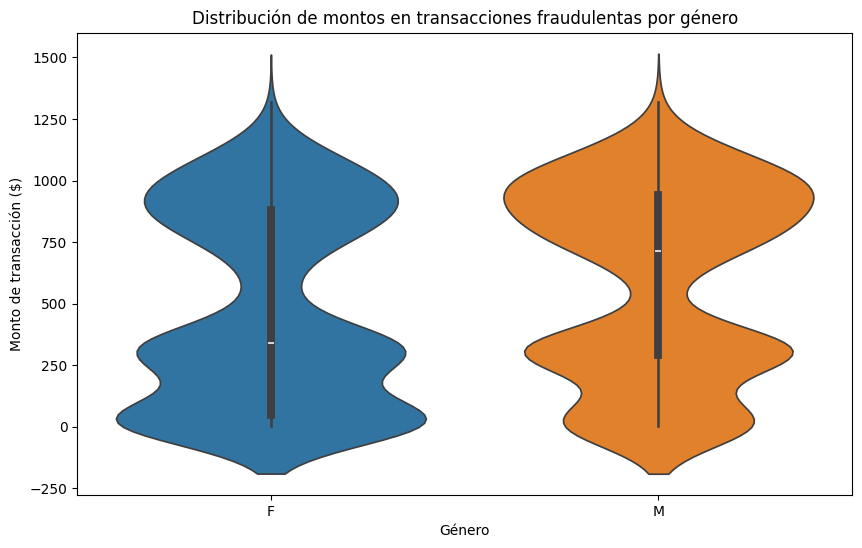

In [ ]:
plt.figure(figsize=(10, 6))
#grafico de violin
sns.violinplot(
    data=fraud_data,
    x='gender',
    y='amt',
    hue='gender'
)

plt.title('Distribución de montos en transacciones fraudulentas por género')
plt.xlabel('Género')
plt.ylabel('Monto de transacción ($)')
plt.show()


Este grafico que en la media el hombre gasta mas en transacciones fradulentas, con transacciones arriba de 500 mientras que la mujero qwuien es mas propensa a las transacciones fraudulentas, como mostro el primer grafico, en promedio si transacciones apenas superan 250

###2.	¿Existe una relación entre los montos altos de las transacciones y la probabilidad de que sean fraudulentas?

La idea es que por medio de un grafico de dispersion ver todas las transacciones separadas por si son o no fraudulentas y y ver si entre los montos de cada una hay algun tipo de relacion.

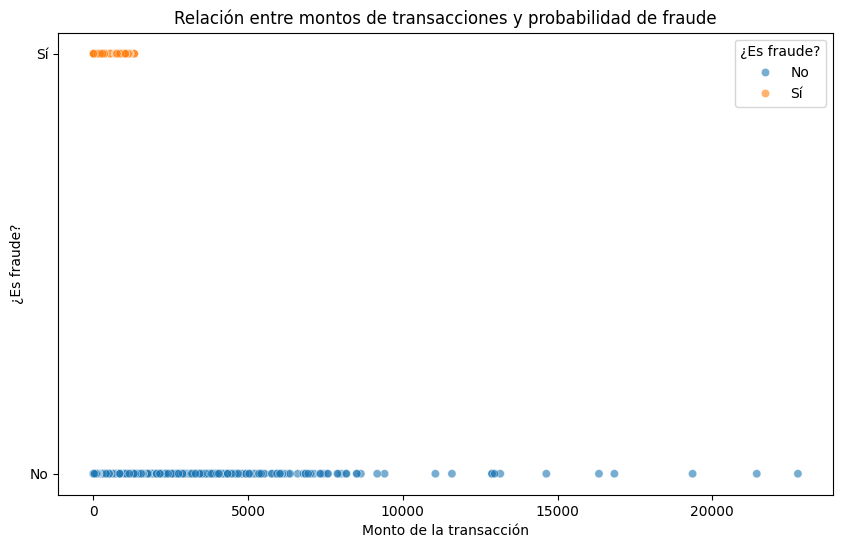

In [ ]:
# gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amt', y='is_fraud', hue='is_fraud', alpha=0.5)

# Configurar el gráfico
plt.title('Relación entre montos de transacciones y probabilidad de fraude')
plt.xlabel('Monto de la transacción')
plt.ylabel('¿Es fraude?')

#cambia las etiquetas de la y
plt.yticks([0, 1], ['No', 'Sí'])

# Personalizar la leyenda para que respete los colores
handles, labels = plt.gca().get_legend_handles_labels()

# Cambiar las etiquetas de la leyenda
labels = ['No', 'Sí']

# Actualizar la leyenda
plt.legend(handles=handles, labels=labels, title='¿Es fraude?')
plt.show()


De todas las transacciones, aquellas que son fraudulentas tiene un rango limitado en el monto gastado por transaccion diria que no superan el monto de 2.000 a diferencia de la no fraudulentas en donde donde su rango es mas amplio y algunas llegan a los 300.000

###3.	¿Los fraudes son más comunes en ciertos días de la semana y/o franjas horarias?

Dada las fechas y los horarios de transacciones fradulentas, se van a contabilizar y ver si hay algun patron, usando drafico de barras separado por diuas y agrupado por franja horaria.

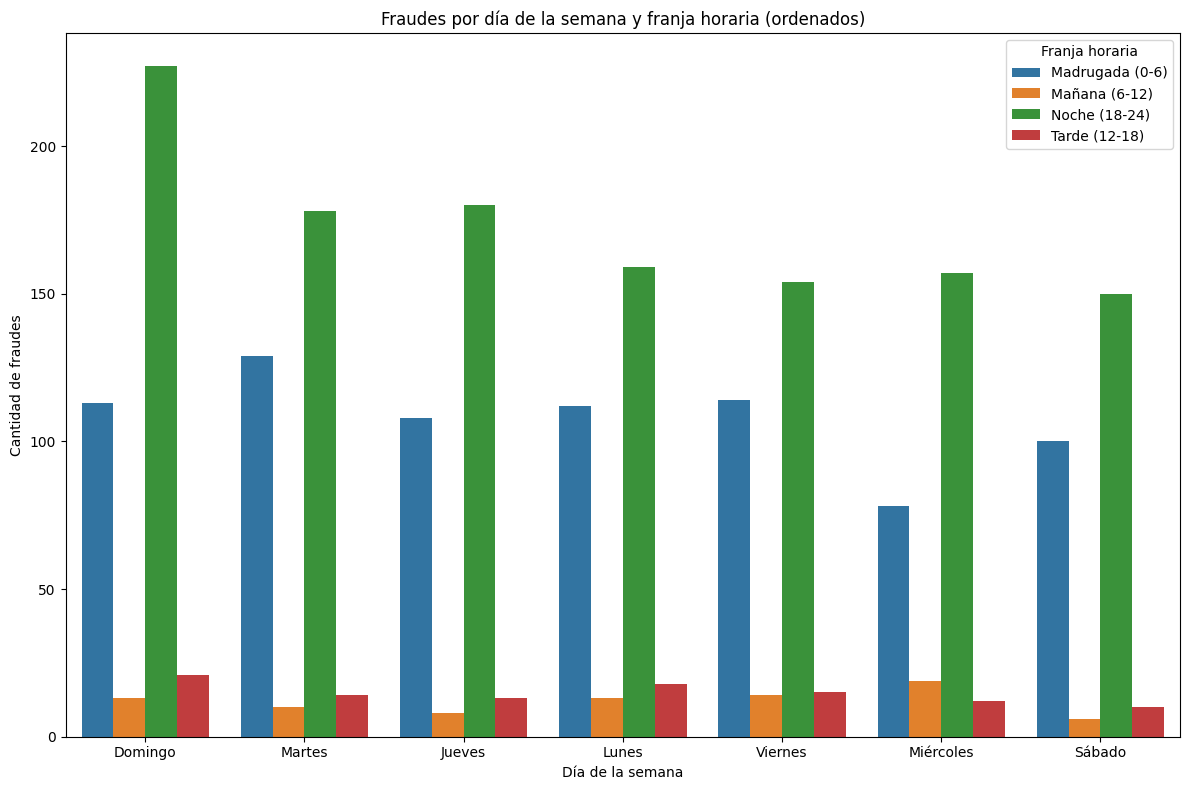

In [ ]:
# de string a datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# dia de la semana (0 = lunes, 6 = domingo)
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

# hora
df['hour'] = df['trans_date_trans_time'].dt.hour

# franja horaria
def get_time_range(hour):
    if 6 <= hour < 12:
        return 'Mañana (6-12)'
    elif 12 <= hour < 18:
        return 'Tarde (12-18)'
    elif 18 <= hour < 24:
        return 'Noche (18-24)'
    else:
        return 'Madrugada (0-6)'

df['time_range'] = df['hour'].apply(get_time_range)#funcion que cree

# dias
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# agrupa por dia y franja horaria
fraud_grouped = fraud_data.groupby(['day_of_week', 'time_range']).size().reset_index(name='count')

# total de fraudes por dia y se ordena de mayor a menor
total_frauds_by_day = fraud_grouped.groupby('day_of_week')['count'].sum().sort_values(ascending=False)

# Ajustar el orden de los días de la semana según el total de fraudes
day_order = total_frauds_by_day.index.tolist()
fraud_grouped['day_of_week'] = pd.Categorical(fraud_grouped['day_of_week'], categories=day_order, ordered=True)

# grafico de barras
plt.figure(figsize=(12, 8))
sns.barplot( data=fraud_grouped, x='day_of_week', y='count', hue='time_range')

ordered_days = [days[i] for i in day_order]
plt.xticks(ticks=range(len(day_order)), labels=ordered_days)

plt.title('Fraudes por día de la semana y franja horaria (ordenados)')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de fraudes')
plt.legend(title='Franja horaria')
plt.tight_layout()
plt.show()


Los dias que mas fradu se cometen son los domingo, martes y jueves mientras    que el resto de los dias de la semana se manejan valores muy similares. Las franjas horarias son muy parecidas entre todos los dias siendo madrugada y noche las que mas destacan mientras que tarde y mañana se mantinen al minimo por igual en todos los dias.